In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("EQ Repository Requested Data.csv")
df

,No,Event ID,Date time,Latitude,Longitude,Magnitude,Mag Type,Depth (km),Phase Count,Azimuth Gap,Location,Agency
0,1,bmg2024inoy,2024-05-01T06:35:52.433043Z,-1.710596,120.091766,2.837047,M,10,23,76.859665,"Sulawesi, Indonesia",BMKG
1,2,bmg2024injv,2024-05-01T04:00:52.007557Z,-5.944668,130.647629,4.846796,MLv,133,48,78.901794,Banda Sea,BMKG
2,3,bmg2024injs,2024-05-01T03:57:30.664236Z,-6.438559,107.307701,2.836673,M,10,25,80.936186,"Java, Indonesia",BMKG
3,4,bmg2024inia,2024-05-01T03:06:11.494109Z,-7.134665,107.558365,4.171044,M,10,69,83.403366,"Java, Indonesia",BMKG
4,5,bmg2024ingp,2024-05-01T02:23:37.672776Z,-7.266338,129.565552,4.551028,M,166,68,55.587601,Banda Sea,BMKG
...,...,...,...,...,...,...,...,...,...,...,...,...
661,666,bmg2024gldq,2024-04-01T11:32:21.820523Z,-8.737351,109.740349,3.031500,M,12,22,237.116982,"Java, Indonesia",BMKG
662,667,bmg2024gldb,2024-04-01T11:14:53.526143Z,4.079156,128.337433,4.160199,M,14,19,255.591034,"North of Halmahera, Indonesia",BMKG
663,668,bmg2024glcw,2024-04-01T11:09:01.756269Z,-0.221772,123.710251,3.289224,M,54,27,87.837761,"Minahassa Peninsula, Sulawesi",BMKG
664,669,bmg2024glbr,2024-04-01T10:32:54.397Z,-5.309146,102.562805,4.191902,M,13,29,156.701263,"Southern Sumatra, Indonesia",BMKG


In [3]:
new_features = ['Latitude', 'Longitude', 'Magnitude', 'Mag Type', 'Depth (km)', 'Phase Count', 'Azimuth Gap']
df_new = df[new_features]

# Mengubah nama kolom agar sesuai dengan yang digunakan dalam model
df_new.columns = ['latitude', 'longitude', 'magnitude', 'magType', 'depth', 'nst', 'gap']
df_new

,latitude,longitude,magnitude,magType,depth,nst,gap
0,-1.710596,120.091766,2.837047,M,10,23,76.859665
1,-5.944668,130.647629,4.846796,MLv,133,48,78.901794
2,-6.438559,107.307701,2.836673,M,10,25,80.936186
3,-7.134665,107.558365,4.171044,M,10,69,83.403366
4,-7.266338,129.565552,4.551028,M,166,68,55.587601
...,...,...,...,...,...,...,...
661,-8.737351,109.740349,3.031500,M,12,22,237.116982
662,4.079156,128.337433,4.160199,M,14,19,255.591034
663,-0.221772,123.710251,3.289224,M,54,27,87.837761
664,-5.309146,102.562805,4.191902,M,13,29,156.701263


In [4]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan label encoding pada kolom 'magType'
df_new['magType'] = label_encoder.fit_transform(df_new['magType'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_3508\2147819625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['magType'] = label_encoder.fit_transform(df_new['magType'])


In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666 entries, 0 to 665
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   latitude   666 non-null    float64
 1   longitude  666 non-null    float64
 2   magnitude  666 non-null    float64
 3   magType    666 non-null    int32  
 4   depth      666 non-null    int64  
 5   nst        666 non-null    int64  
 6   gap        666 non-null    float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 33.9 KB


In [6]:
df_new.isnull().sum()

latitude     0
longitude    0
magnitude    0
magType      0
depth        0
nst          0
gap          0
dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler

#normalisasi data dengan standartscaler menjadi skala 0-1
sc = StandardScaler()
x_scaled  = pd.DataFrame(sc.fit_transform(df_new), columns=df_new.columns)

In [8]:
x_scaled

,latitude,longitude,magnitude,magType,depth,nst,gap
0,0.342213,-0.013796,-0.812283,-0.285642,-0.580228,-0.506506,-0.812661
1,-0.667512,1.001680,2.190371,2.733998,1.637020,0.463288,-0.779027
2,-0.785293,-1.243626,-0.812842,-0.285642,-0.580228,-0.428923,-0.745520
3,-0.951298,-1.219512,1.180767,-0.285642,-0.580228,1.277914,-0.704885
4,-0.982699,0.897584,1.748480,-0.285642,2.231891,1.239123,-1.163019
...,...,...,...,...,...,...,...
661,-1.333500,-1.009605,-0.521762,-0.285642,-0.544176,-0.545298,1.826823
662,1.722930,0.779439,1.164565,-0.285642,-0.508123,-0.661673,2.131096
663,0.697261,0.334303,-0.136711,-0.285642,0.212934,-0.351339,-0.631849
664,-0.515955,-1.700086,1.211930,-0.285642,-0.526149,-0.273756,0.502353


In [10]:
import joblib

# Memuat model dari file
load_model = joblib.load('rf2_model.pkl')

In [11]:
# Misalkan data baru disimpan dalam DataFrame baru dengan nama 'new_data'
predictions = load_model.predict(x_scaled)
x_scaled['alert'] = predictions

In [12]:
x_scaled.head(20)

,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,0.342213,-0.013796,-0.812283,-0.285642,-0.580228,-0.506506,-0.812661,3
1,-0.667512,1.001680,2.190371,2.733998,1.637020,0.463288,-0.779027,0
2,-0.785293,-1.243626,-0.812842,-0.285642,-0.580228,-0.428923,-0.745520,0
3,-0.951298,-1.219512,1.180767,-0.285642,-0.580228,1.277914,-0.704885,0
4,-0.982699,0.897584,1.748480,-0.285642,2.231891,1.239123,-1.163019,0
5,-1.183315,-1.185399,0.177685,-0.285642,-0.111542,1.588248,1.327489,3
6,2.118780,0.624922,1.496589,-0.285642,1.132280,0.424496,0.803657,3
7,0.253848,0.745391,-0.170170,-0.285642,0.122802,-0.467714,-0.506525,0
8,0.660680,0.345123,-0.192530,-0.285642,0.014643,0.152954,-0.992483,1
9,0.810187,0.213537,-1.716963,-0.285642,2.285970,-0.428923,-0.869263,0


In [13]:
x_scaled['alert'].value_counts()

0    434
3    113
1     86
2     33
Name: alert, dtype: int64

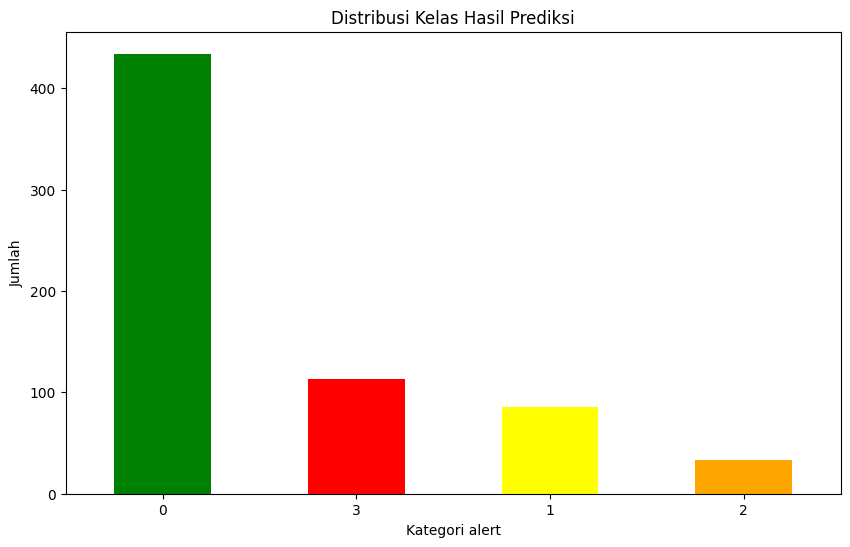

In [14]:
# Visualisasikan distribusi kelas setelah SMOTE
plt.figure(figsize=(10, 6))
x_scaled['alert'].value_counts().plot(kind='bar', color=['green', 'red', 'yellow', 'orange'])
plt.title('Distribusi Kelas Hasil Prediksi')
plt.xlabel('Kategori alert')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [15]:
# Ganti kolom latitude dan longitude di x_scaled dengan yang ada di df_new
x_scaled['latitude'] = df_new['latitude']
x_scaled['longitude'] = df_new['longitude']

In [16]:
x_scaled

,latitude,longitude,magnitude,magType,depth,nst,gap,alert
0,-1.710596,120.091766,-0.812283,-0.285642,-0.580228,-0.506506,-0.812661,3
1,-5.944668,130.647629,2.190371,2.733998,1.637020,0.463288,-0.779027,0
2,-6.438559,107.307701,-0.812842,-0.285642,-0.580228,-0.428923,-0.745520,0
3,-7.134665,107.558365,1.180767,-0.285642,-0.580228,1.277914,-0.704885,0
4,-7.266338,129.565552,1.748480,-0.285642,2.231891,1.239123,-1.163019,0
...,...,...,...,...,...,...,...,...
661,-8.737351,109.740349,-0.521762,-0.285642,-0.544176,-0.545298,1.826823,0
662,4.079156,128.337433,1.164565,-0.285642,-0.508123,-0.661673,2.131096,2
663,-0.221772,123.710251,-0.136711,-0.285642,0.212934,-0.351339,-0.631849,3
664,-5.309146,102.562805,1.211930,-0.285642,-0.526149,-0.273756,0.502353,0


In [17]:
x_scaled.to_csv('Hasil Prediksi')

In [20]:
import folium

# Fungsi untuk menentukan warna berdasarkan nilai alert
def get_color(alert):
    if alert == 0:
        return 'green'
    elif alert == 1:
        return 'yellow'
    elif alert == 2:
        return 'orange'
    elif alert == 3:
        return 'red'

# Buat peta Indonesia
Indonesia = folium.Map(location=[-2.5, 118], zoom_start=5)

# Tambahkan lingkaran di setiap titik koordinat dari data x_scaled
for index, row in x_scaled.iterrows():
    folium.Circle(
        location=[row['latitude'], row['longitude']],
        radius=10000,  # Atur radius lingkaran sesuai keinginan Anda
        color=get_color(row['alert']),
        fill=True,
        fill_color=get_color(row['alert'])
    ).add_to(Indonesia)

# Tampilkan peta
Indonesia

In [ ]:
# Simpan DataFrame ke dalam file CSV
x_scaled.to_csv('datagempa.csv', index=False)

In [19]:
pip install folium

Note: you may need to restart the kernel to use updated packages.
                                              0.0/100.0 kB ? eta -:--:--
     ----                                     10.2/100.0 kB ? eta -:--:--
     ----------------------                61.4/100.0 kB 656.4 kB/s eta 0:00:01
     ------------------------------------ 100.0/100.0 kB 575.5 kB/s eta 0:00:00
                                              0.0/83.9 kB ? eta -:--:--
     ---------------------------------------  81.9/83.9 kB 2.3 MB/s eta 0:00:01
     ---------------------------------------- 83.9/83.9 kB 1.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
